In [1]:
import os 
import tarfile
from six.moves import urllib
import pandas as pd

In [2]:
download_root="http://raw.githubusercontent.com/ageron/handson-ml/master/"
housing_path=os.path.join("datasets","housing")
housing_url=download_root+housing_path+"/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=housing_url,housing_path=housing_path):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path=os.path.join(housing_path,"housing.tgz")
    
    
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz=tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
def load_housing_data(housing_path=housing_path):
    csv_path=os.path.join(housing_path,"housing.csv")
    return pd.read_csv(csv_path)

In [5]:
fetch_housing_data(housing_url=housing_url,housing_path=housing_path)

In [6]:
housing=load_housing_data()

In [7]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


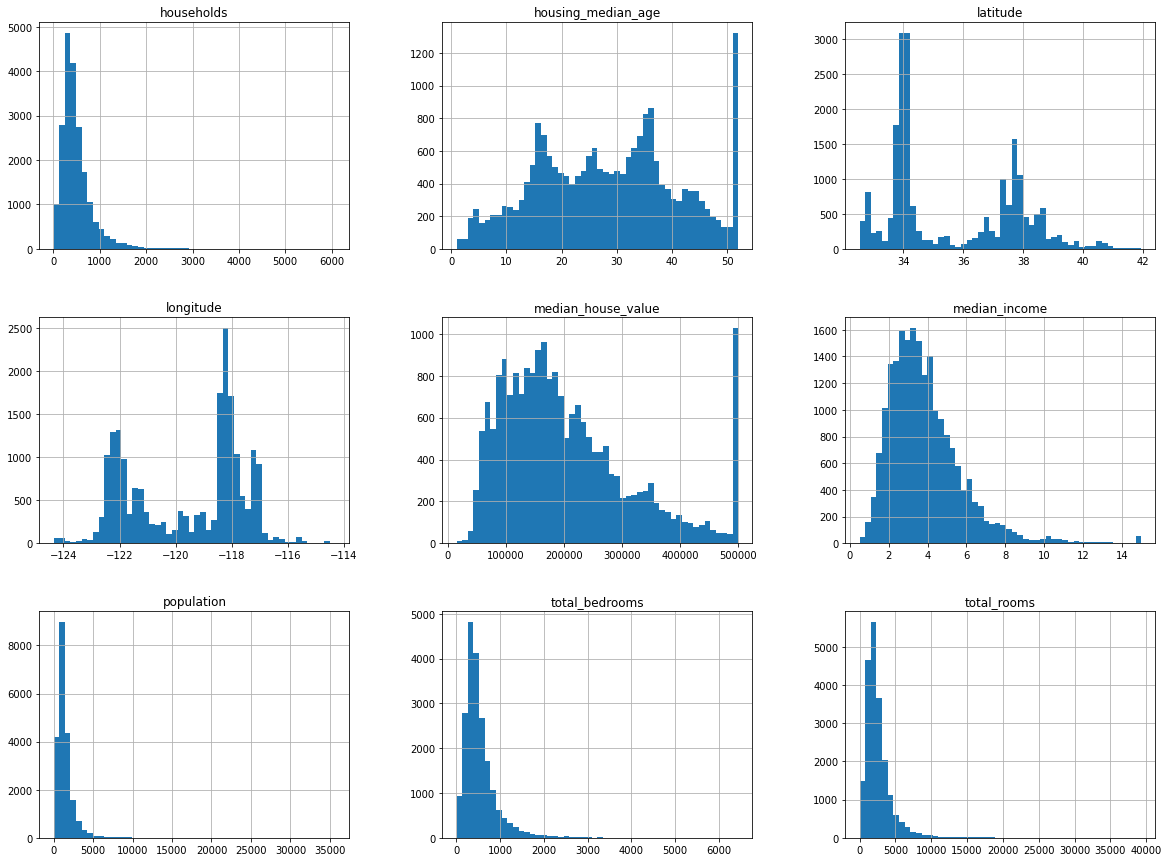

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
housing.hist(bins=50,figsize=(20,15))
plt.show()

In [10]:
import numpy as np

In [11]:
def split_train_test(data,test_ratio):
    shuffled_indices=np.random.permutation(len(data))
    test_set_size=int(len(data)*test_ratio)
    test_indices=shuffled_indices[:test_set_size]
    train_indices=shuffled_indices[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [12]:
train_set,test_set=split_train_test(housing,0.2)

In [13]:
print(len(train_set),"train +",len(test_set),"test" )

16512 train + 4128 test


In [14]:
import hashlib 
def test_set_check(identifier,test_ratio,hash=hashlib.md5):
    return hash(np.int64(identifier)).digest()[-1]<256*test_ratio

def split_train_test_by_id(data, test_ratio, id_column):
    ids = data[id_column]
    in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
    return data.loc[~in_test_set], data.loc[in_test_set]

In [15]:
housing_with_id= housing.reset_index()


In [16]:
train_set,test_set= split_train_test_by_id(housing_with_id, 0.2, 'index' )

In [17]:
housing_with_id['id']=housing["longitude"]*1000 +housing['latitude']
train_set,test_set= split_train_test_by_id(housing_with_id, 0.2, 'id' )

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

In [20]:
housing["income_cat"]=np.ceil(housing["median_income"]/1.5)
housing["income_cat"].where(housing["income_cat"]<5,5.0,inplace=True)

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit

In [22]:
split=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing, housing["income_cat"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [23]:
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

In [24]:
for set_ in (strat_train_set,strat_test_set):
    set_.drop("income_cat",axis=1,inplace=True)

In [25]:
housing=strat_train_set.copy()

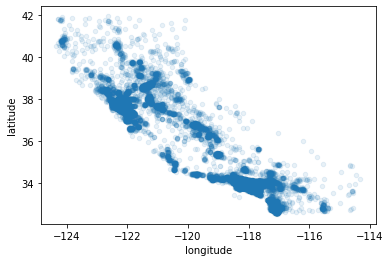

In [26]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

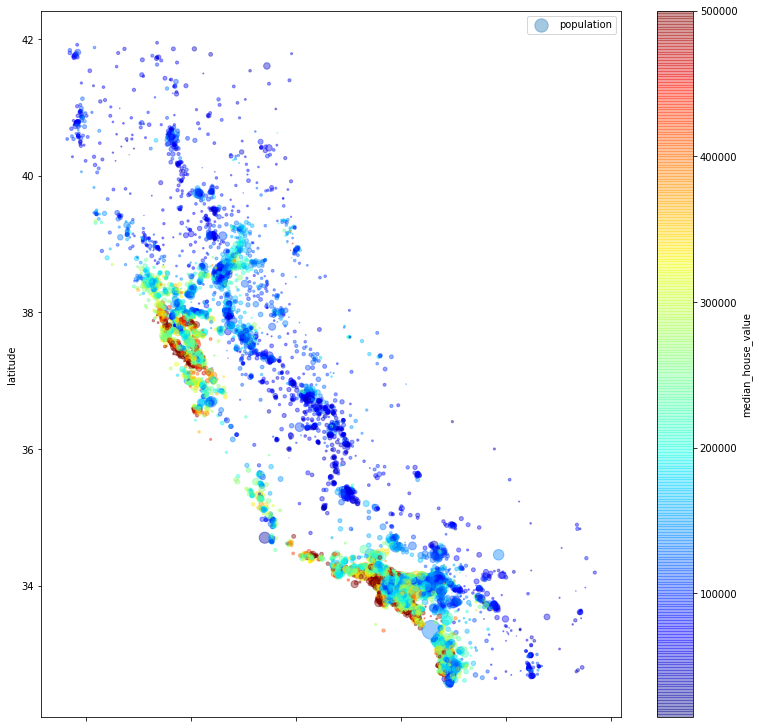

In [27]:
housing.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,s=housing["population"]/100,
             label="population",figsize=(13,13),
            c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)

In [28]:
corr_matrix=housing.corr()

In [29]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [31]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f475d818c10>,
      dtype=object)

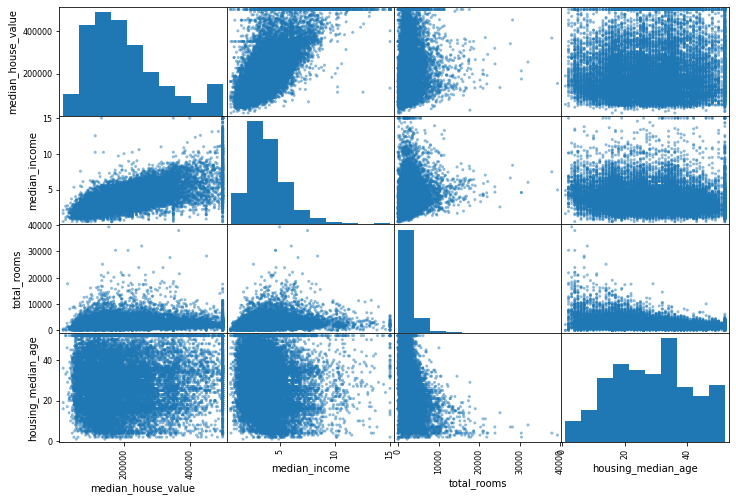

In [33]:
attribites=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(housing[attribites],figsize=(12,8))